# Interpolación

Se denomina interpolación a la obtención de nuevos puntos partiendo del conocimiento de un conjunto discreto de puntos:

| $x$ | $x_0$ | $x_1$ | ... | $x_n$ |
|-----|-------|-------|-----|-------|
| $y$ | $y_0$ | $y_1$ | ... | $y_n$ |


con $x_i$ todos distintos.

## Introducción
Si tenemos N puntos nuestro polinomio tendrá que ser de grado menor o igual que N–1, pero cuando N empieza a ser grande (del orden de 10 o más) a menos que los puntos estén muy cuidadosamente elegidos el polinomio oscilará salvajemente. Esto se conoce como fenómeno de Runge.

Para ver esto podemos estudiar el clásico ejemplo con la función Runge:

$f(x)= \frac{1}{1+x^2}$

veamos qué sucede si la interpolamos en nodos equiespaciados. Para ello vamos a usar la función `barycentric_interpolate`. Según Berrut y Trefethen: 
> El método de interpolación baricéntrica merece ser conocido como el método estándar de interpolación polinómica

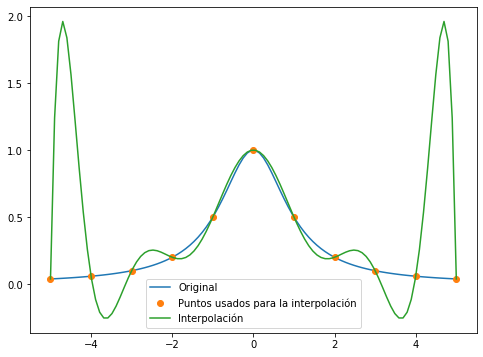

In [ ]:
import numpy as np
from scipy.interpolate import barycentric_interpolate, lagrange

xp = np.arange(11) - 5 # -5, -4, -3, …, 3, 4, 5 -> 11 elementos
fp = 1 / (1 + xp ** 2) # Valores de y de la Función de Runge con 11 elementos

# Nuevo rango para x para la interpolación
x = np.linspace(-5, 5, 100) # 100 elementos
# Interpolación
y = barycentric_interpolate(xp, fp, x)

fp2 = 1 / (1 + x ** 2) # Valores de y de la Función de Runge con 100 elementos


# Visualmente representado
import matplotlib.pyplot as plt
# Crea una figura
fig, ax = plt.subplots(figsize=(8,6))
# Añade los datos de la función original
ax.plot(x, fp2, label='Original')
# Añade los puntos para la interpolación de la función original
ax.plot(xp, fp, 'o', label='Puntos usados para la interpolación')
# Añade los datos de la interpolación
ax.plot(x, y, label='Interpolación')
# Añade la leyenda
ax.legend()

Existe una forma de mitigar este problema, que es, escogiendo los puntos cuidadosamente y/o el metodo apropriado.

In [ ]:
import sympy
from sympy.abc import x, y, z

## Lagrange

Para un conjunto dado de $n+1$ puntos $x_i$, los $n+1$ polinomios de Lagrange $l_i$ están definidos por:

$l_i(x_j) = \delta_{ij} = 
\begin{cases}
    0  & \quad \text{if } i \neq j\\
    1  & \quad \text{if } i = j
\end{cases}
$

Se define el polinomio interpolador de Lagrange como

$p_n(x) = \sum_{i=0}^{n}y_il_i(x)$

Si cada polinomio de Lagrange es de grado $n$, entonces $p_n$ también tiene este grado.
Además:

$l_i(x) = \prod_{j=0,j \neq i}^{n}\frac{x-x_i}{x_i-x_j}$

En python podemos usar la función `interpolating_poly` de sympy para representar un polinómio de Lagrange.

In [ ]:
# Polinomio de Lagrange de grado 3
sympy.polys.specialpolys.interpolating_poly(3,x)

y0*(x - x1)*(x - x2)/((x0 - x1)*(x0 - x2)) + y1*(x - x0)*(x - x2)/((-x0 + x1)*(x1 - x2)) + y2*(x - x0)*(x - x1)/((-x0 + x2)*(-x1 + x2))

Al ejemplo anterior faltaría pasar los puntos de $x$ y $y$ para generar una interpolación. Usemos los seguientes valores para $x$ y $y$ para probar su funcionamiento:

$ x = [1,2,3]$  
$ y = [3,-10,2]$

Los tramos son:

$l_0(x) = \frac{(x-2)(x-3)}{(1-2)(1-3)} = \frac{1}{2}(x-2)(x-3)$  
$l_1(x) = \frac{(x-1)(x-3)}{(2-1)(2-3)} = -(x-1)(x-3)$  
$l_2(x) = \frac{(x-1)(x-2)}{(3-1)(3-2)} = \frac{1}{2}(x-1)(x-3)$

y construyendo el polinómio manualmente:

$p_2(x) = \frac{3)}{2}(x-2)(x-3)+10(x-1)(x-3)+(x-1)(x-2)$

Confirmemos con código:

In [ ]:
sympy.polys.specialpolys.interpolating_poly(3,x,X=[1,2,3],Y=[3,-10,2]) # argumentos: grado, variable, valores de x, valores de y

3*(x - 3)*(x - 2)/2 + 10*(x - 3)*(x - 1) + (x - 2)*(x - 1)

In [ ]:
# Scipy también puede calcular Lagrange pero en este caso obtiene los cocientes
print(lagrange([1,2,3],[3,-10,2]))

      2
12.5 x - 50.5 x + 41


### Exemplo - sympy

$ x = [1,2,3,4]$  
$ y = [2,4,3,5]$

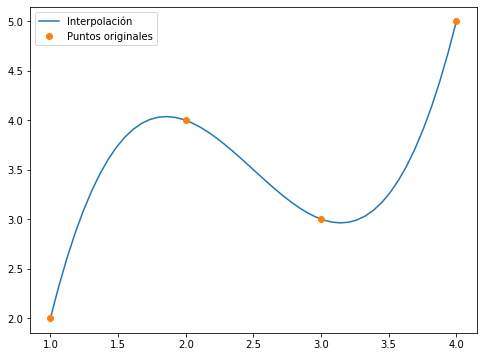

In [ ]:
# Puntos a interpolar
x_ej1 = [1,2,3,4]
y_ej1 = [2,4,3,5]

# Lista de 50 elementos entre 1 y 4 (x_ej1) equidistantes
x_muchos_puntos = np.linspace(1,4)

# Crear el polinomio de Lagrange
poli = sympy.polys.specialpolys.interpolating_poly(4,x,X=x_ej1,Y=y_ej1)

# Valores de poly(x_muchos_puntos)
ypoly = [poli.subs(x,i) for i in x_muchos_puntos]

# Crea una figura
fig, ax = plt.subplots(figsize=(8,6))
# Añade los datos de la función original
ax.plot(x_muchos_puntos, ypoly, label='Interpolación')
# Añade los datos de la interpolación
ax.plot(x_ej1, y_ej1, 'o', label='Puntos originales')
# Añade la leyenda
ax.legend()

## Newton

Supongamos que tenemos datos y el polinomio interpolador de Lagrange, si nos dan un nuevo punto $(x_{n+1}, y_{n+1})$, cada polinomio de Lagrange debe ser actualizado lo que conlleva mucho calculo (especialmente si $n$ es grande).

La alternativa es construir polinomios de forma iterativa. De esta forma, se
crean polinomios $p_k(x)$ tal que $p_k(x_i) = y_i$ para $0 \leq i \leq k$.
Esto es simple para $k = 0$:

$p_0(x) = a_0 = y_0$


Suponinedo que se tiene $p_k(x)$ se quiere obtener $p_{k+1}(x)$.

Se construye de la seguiente forma:

$$ p_{k+1}(x) = p_k(x) + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + \dots + a_n(x-x_0)(x-x_1)\dots(x-x_k)$$

para las constantes $\{a_1,a_2,...,a_k\}$ (que son los coeficientes)

Esto puede ser reescrito como:

$$ p_k(x) = \sum_{i=0}^{k}{a_in_i(x)}$$ 

donde $$ n_i(x) = \prod_{j=0}^{i-1}(x-x_j)$$

Para $p_1(x)$: 

$p_1(x) = a_0 + a_1(x-x_0) = p_0(x) + a_1(x-x_0) = y_1$

que de otro modo es:

$$a_1 = \frac{y_1 - y_0}{x - x_0}$$

Si insertamos nuevos puntos $(x_2, y_2)$ obtenemos:

$p_2(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) = p_1(x) + a_2(x-x_0)(x-x_1) = y_2$

que de otro modo es:
$$a_2 = \frac{\frac{y_2 - y_1}{x - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x - x_0}$$

### Ejemplo 1

Obtén el polinomio interpolador de los seguientes datos:
$(1,3),(0.5,-10),(3,2)$

$p_0(x) = y_0 = 3$
<br><br>
$p_1(x) = 3 + a_1(x − 1) = y_1 \implies  p_1(0.5) = -10 \implies -10 = 3 + a_1(−0.5) \implies a_1 = 26 \implies p_1(x) = 3 + 26(x − 1)$
<br><br>
$p_2(x) = p_1(x) + a_2(x − 1)(x − 0.5) \implies p_2(x) = 3 + 26(x − 1) + a_2(x − 1)(x − 0.5) \implies p_2(3) = 2 \implies 2 = 3 + 26(2) + a_2(2)(\frac{5}{2}) \implies a_2 = \frac{-53}{5}$
<br><br>
El polinómio final es:

$p_2(x) = 3 + 26(x − 1) + \frac{-53}{5}(x − 1)(x − 0.5)$

comprobamos:

In [ ]:
p2 = 3 + 26*(x - 1) + (-53/5)*(x - 1)*(x - 0.5)
print(p2.subs(x,1))
print(p2.subs(x,0.5))
print(p2.subs(x,3))

3
-10.0000000000000
2.00000000000001


Los patrones que se pueden identificar son las **diferencias divididas**. Si definimos:

$$ f[x_i] = f(x_i)$$

$$ f[x_0, x_1] = \frac{f[x_1] - f[x_0]}{x_1 - x_0}$$

$$ f[x_1, x_2] = \frac{f[x_2] - f[x_1]}{x_2 - x_1}$$

$$ f[x_0, x_1, x_2] = \frac{\frac{f[x_2] - f[x_1]}{x_2 - x_1} - \frac{f[x_1] - f[x_0]}{x_1 - x_0}}{x_2 - x_0} = \frac{f[x_2,x_1] - f[x_1,x_0]}{x_2-x_0}$$

y por lo tanto:

$$ f[x_0, x_{1}, \dots, x_{k-1}, x_k] = \frac{f[x_1, x_{2}, \dots, x_{k-1},x_k] - f[x_0, x_1, \dots, x_{k-1}]}{x_k-x_0}$$


Podemos ver que una vez que se determinan los coeficientes, agregar nuevos puntos no cambiará los calculados, solo es necesario calcular las diferencias más altas de la misma manera. Todo el procedimiento para encontrar estos coeficientes se puede resumir en una tabla de diferencias divididas. Veamos un ejemplo usando 5 puntos de datos:

$$
\begin{array}{cccccc}
x   & f[] &  f[,]       & f[,,]        & f[,,,]         & f[,,,,]\\
x_0 & y_0 \\
    &     & f[x_0,x_1] \\
x_1 & y_1 &             & f[x_0, x_1,x_2]\\
    &     & f[x_1,x_2]  &              & f[x_0, x_1, x_2,x_3]\\
x_2 & y_2 &             & f[x_1, x_2,x_3] &             & f[x_0, x_1, x_2, x_3,x_4]\\
    &     & f[x_2,x_3]  &              & f[x_1, x_2, x_3, x_4]\\
x_3 & y_3 &             & f[x_2, x_3,x_4]\\
    &     & f[x_3,x_4] \\
x_4 & y_4
\end{array}
$$

que en una tabla se puede representar de la seguiente forma:

$$
\begin{array}{cccccc}
f[] & f[,]       & f[,,]           & f[,,,]               & f[,,,,]\\
y_0 & f[x_1,x_0] & f[x_2, x_1,x_0] & f[x_3, x_2, x_1,x_0] & f[x_4, x_3, x_2, x_1,x_0]\\
y_1 & f[x_2,x_1] & f[x_3, x_2,x_1] & f[x_4, x_3, x_2, x_1] & 0\\
y_2 & f[x_3,x_2] & f[x_4, x_3,x_2] & 0          & 0 \\
y_3 & f[x_4,x_3] & 0 & 0 & 0            \\
y_4 & 0 & 0 & 0  & 0  
\end{array}
$$

**Se debe tener en cuenta que la primera fila de la tabla son en realidad todos los coeficientes que necesitamos, es decir, $a_0, a_1, a_2, a_3, a_4 $.**

### Ejemplo 2

In [ ]:
## A complementar en el ejercicio 4 y 5

x_puntos = [1, 0.5, 3]
y_puntos = [3, -10, 2]

# def diff_div(x_data, y_data):

# def pol_newton(coefs):


print("Calculo de los coeficientes")
print("f[,]")
print("[[  3.   26.    0. ]")
print(" [-10.    4.8   0. ]")
print(" [  2.    0.    0. ]]")

print("f[,,]")
print("[[  3.   26.  -10.6]")
print(" [-10.    4.8   0. ]")
print(" [  2.    0.    0. ]]")

print("Polinómio")
from IPython.display import display, Latex
display(Latex("- 10.6 x^{2} + 41.9 x - 28.3"))

Calculo de los coeficientes
f[,]
[[  3.   26.    0. ]
 [-10.    4.8   0. ]
 [  2.    0.    0. ]]

f[,,]
[[  3.   26.  -10.6]
 [-10.    4.8   0. ]
 [  2.    0.    0. ]]

Polinómio


-10.6*x**2 + 41.9*x - 28.3

A la primera vista puede no parecer lo mismo que el ejemplo presentado anteriormente pero si se resuelve la expresión:

$3+26\left(x-1\right)+\frac{-53}{5}\left(x-1\right)\left(x-0.5\right) =3+26\left(x-1\right)-\frac{53}{5}\left(x-1\right)\left(x-0.5\right)$

$=3+26\left(x-1\right)-10.6\left(x-1\right)\left(x-0.5\right)$
<br><br>
Expandiendo $26(x-1) = 26x-26$
<br><br>
$=3+26x-26-10.6\left(x-1\right)\left(x-0.5\right)$
<br><br>
Expandiendo  $-10.6(x-1)(x-0.5) = -10.6x^2 + 15.9x - 5.3$
<br><br>
$=3+26x-26-10.6x^2+15.9x-5.3 $

$= -10.6x^2+41.9x-28.3$
<br><br>
Y esto es igual al obtenido arriba.

### Ejemplo 3

In [ ]:
x_puntos = [-5, -1, 0, 2]
y_puntos = [-2, 6, 1, 3]

poli_dd = diff_div(x_puntos,y_puntos)
poli_dd

Calculo de los coeficientes
f[,]
[[-2.  2.  0.  0.]
 [ 6. -5.  0.  0.]
 [ 1.  1.  0.  0.]
 [ 3.  0.  0.  0.]]

f[,,]
[[-2.   2.  -1.4  0. ]
 [ 6.  -5.   2.   0. ]
 [ 1.   1.   0.   0. ]
 [ 3.   0.   0.   0. ]]

f[,,,]
[[-2.          2.         -1.4         0.48571429]
 [ 6.         -5.          2.          0.        ]
 [ 1.          1.          0.          0.        ]
 [ 3.          0.          0.          0.        ]]



0.485714285714286*x**3 + 1.51428571428571*x**2 - 3.97142857142857*x + 1.0

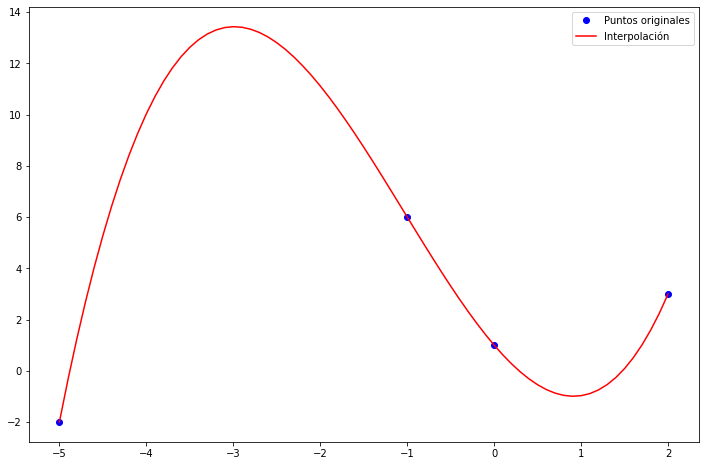

In [ ]:
x_nuevo = np.arange(-5, 2.1, .1)
from sympy import lambdify
# crea una función iterable desde poli_dd
f = lambdify(x, poli_dd, "numpy")

# Enseñar gráfica
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(x_puntos, y_puntos, 'bo', label="Puntos originales")
ax.plot(x_nuevo, f(x_nuevo), 'r', label="Interpolación")
ax.legend()

## Splines


Los splines no son más que curvas polinómicas definidas a trozos, normalmente de grado 3 (casi nunca mayor de 5). Al ser cada uno de los trozos de grado pequeño se evita el fenómeno de Runge, y si se "empalman" los trozos inteligentemente la curva resultante será suave (matemáticamente: diferenciable) hasta cierto punto. Cuando queremos una curva que pase por todos los puntos disponibles un spline es justamente lo que necesitamos.

El spline más elemental, el lineal (grado 1), se puede construir rápidamente en NumPy usando `np.interp`. 

El más común, el cúbico (grado 3), se puede construir con el método `scipy.interpolate.InterpolatedUnivariateSpline` con el argumento $k$ igual a 3 (acepta entre 1 y 5), o el método `scipy.interpolate.interp1d` con el terceer argumento igual a 'cubic'. Ls diferencia entre estos dos es el algoritmo usado para calcular los nudos.

Para obtener la representación algébrica se puede utilizar el `sympy.interpolating_spline` (ten en atención que este método puede tardar mucho tiempo a calcular).

Veamos ejemplos de cada uno de estos.

### Ejemplo 1 - sympy

In [ ]:
from sympy import interpolating_spline
from sympy.abc import x
from math import sin
a = list(range(11))
b = list(map(sin,a))
interpolating_spline(3, x, a, b)

Piecewise((-0.0418605525500531*x**3 - 0.261240613744896*x**2 + 1.14457215110285*x, (x >= 0) & (x <= 2)), (0.146943444756778*x**3 - 1.39406459758589*x**2 + 3.41022011878483*x - 1.51043197845465, (x >= 2) & (x <= 3)), (0.160345549704558*x**3 - 1.5146835421159*x**2 + 3.77207695237487*x - 1.8722888120447, (x >= 3) & (x <= 4)), (0.0372201650395559*x**3 - 0.0371789261358767*x**2 - 2.13794151154523*x + 6.00773580651544, (x >= 4) & (x <= 5)), (-0.123396378055944*x**3 + 2.37206922029662*x**2 - 14.1841822437077*x + 26.0848036934529, (x >= 5) & (x <= 6)), (-0.1683718881817*x**3 + 3.18162840256024*x**2 - 19.0415373372894*x + 35.7995138806163, (x >= 6) & (x <= 7)), (-0.0640398386838786*x**3 + 0.990655363105978*x**2 - 3.70472606110962*x + 0.0136209028634271, (x >= 7) & (x <= 8)), (0.118950282644119*x**3 - 3.40110754876597*x**2 + 31.4293772338659*x - 93.6773212170714, (x >= 8) & (x <= 10)))

### Ejemplo 2 - np.interp

Tomar los datos de la silueta del pato de la clase de teoría.

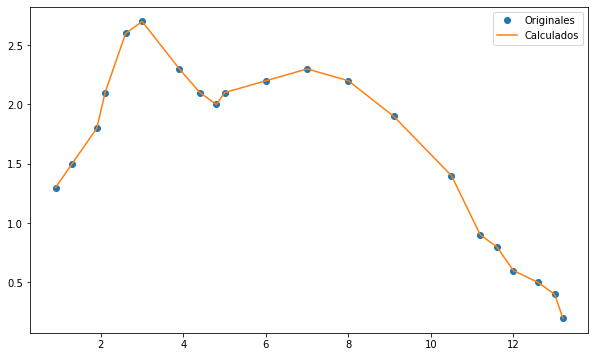

In [ ]:
import numpy as np

# Pato
x_pato = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.8, 5.0, 6.0, 7.0, 8.0, 9.1, 10.5, 11.2, 11.6, 12, 12.6, 13, 13.2]
y_pato = [1.3, 1.5, 1.8, 2.1, 2.6, 2.7, 2.3, 2.1, 2.0, 2.1, 2.2, 2.3, 2.2, 1.9, 1.4, 0.9, 0.8, 0.6, 0.5, 0.4, 0.2]

x_dominio = np.linspace(min(x_pato), max(x_pato), num=1001) # Dominio
y1d = np.interp(x_dominio, x_pato, y_pato)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x_pato, y_pato, 'o', label="Originales")
ax.plot(x_dominio, y1d, '-', label="Calculados")
ax.legend()

### Ejemplo 3 - scipy.interpolate.interp1d

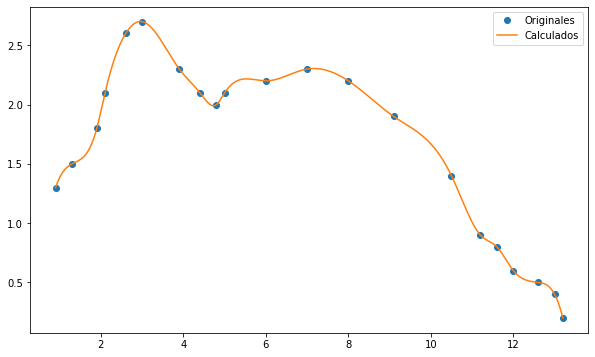

In [ ]:
from scipy import interpolate
x_pato = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.8, 5.0, 6.0, 7.0, 8.0, 9.1, 10.5, 11.2, 11.6, 12, 12.6, 13, 13.2]
y_pato = [1.3, 1.5, 1.8, 2.1, 2.6, 2.7, 2.3, 2.1, 2.0, 2.1, 2.2, 2.3, 2.2, 1.9, 1.4, 0.9, 0.8, 0.6, 0.5, 0.4, 0.2]

x_dominio = np.linspace(min(x_pato), max(x_pato), num=1001) # Dominio

yi1d = interpolate.interp1d(x_pato,y_pato,'cubic')(x_dominio)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x_pato, y_pato, 'o', label="Originales")
ax.plot(x_dominio, yi1d, '-', label="Calculados")
ax.legend()

### Ejemplo 4 - scipy.interpolate.InterpolatedUnivariateSpline

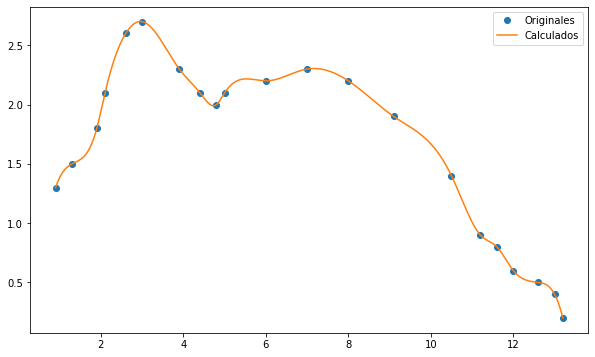

In [ ]:
# Pato
x_pato = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.8, 5.0, 6.0, 7.0, 8.0, 9.1, 10.5, 11.2, 11.6, 12, 12.6, 13, 13.2]
y_pato = [1.3, 1.5, 1.8, 2.1, 2.6, 2.7, 2.3, 2.1, 2.0, 2.1, 2.2, 2.3, 2.2, 1.9, 1.4, 0.9, 0.8, 0.6, 0.5, 0.4, 0.2]

from scipy.interpolate import InterpolatedUnivariateSpline

x_dominio = np.linspace(min(x_pato), max(x_pato), num=1001) # Dominio

yi1d = InterpolatedUnivariateSpline(x_pato,y_pato,k=3)(x_dominio)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x_pato, y_pato, 'o', label="Originales")
ax.plot(x_dominio, yi1d, '-', label="Calculados")
ax.legend()

### Ejemplo 5 - comparar métodos de scipy

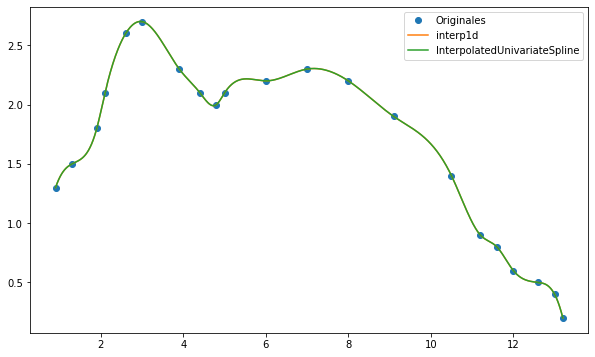

In [ ]:
# Comparar interp1d y InterpolatedUnivariateSpline

# Pato
x_pato = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.8, 5.0, 6.0, 7.0, 8.0, 9.1, 10.5, 11.2, 11.6, 12, 12.6, 13, 13.2]
y_pato = [1.3, 1.5, 1.8, 2.1, 2.6, 2.7, 2.3, 2.1, 2.0, 2.1, 2.2, 2.3, 2.2, 1.9, 1.4, 0.9, 0.8, 0.6, 0.5, 0.4, 0.2]

from scipy.interpolate import InterpolatedUnivariateSpline

x_dominio = np.linspace(min(x_pato), max(x_pato), num=1001) # Dominio

yius = InterpolatedUnivariateSpline(x_pato,y_pato,k=3)(x_dominio)
yi1d = interpolate.interp1d(x_pato,y_pato,'cubic')(x_dominio)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x_pato, y_pato, 'o', label="Originales")
ax.plot(x_dominio, yi1d, '-', label="interp1d")
ax.plot(x_dominio, yius, '-', label="InterpolatedUnivariateSpline")
ax.legend()

# Ejercicios

## 1

Obtenga el spline cúbico para los datos  
$(0, 1),(1, -1),(2, 2),(3, 1),(4, 0)$

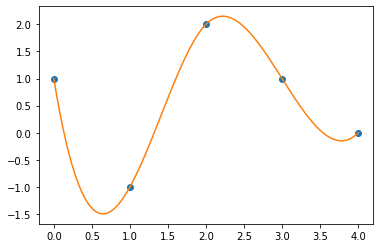

## 2

Dado el siguiente conjunto de datos

$$
\begin{array}{c|c|c|c|c|c|c|c}
f(x) & 100 & 150 & 200 & 250 & 300 & 400 & 500\\
x & 2506.7 & 2582.8 & 2658.1 & 2733.7 & 2810.4 & 2967.9 & 3131.6\\
\end{array}
$$

realize:

1. Gráfico de los puntos.
2. Calcule, utilizando el comando interp1d, el valor de $f(x)$ cisando $x = 2680.78$
3. Pruebe con dos tipos de interpolaciones

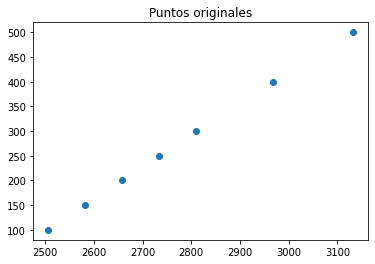

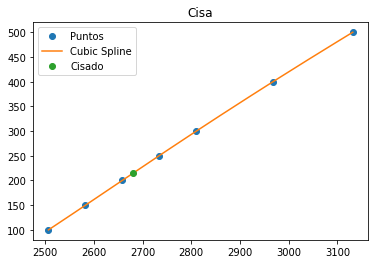

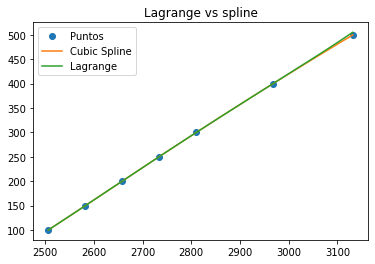

## 3

Sea $P(x)$ el polinomio interpolante para la función $y = cos(x)$ en $n$ puntos equidistantes $(x1, y1), . . . , (xn, yn)$ en el intervalo $[0, 2]$. Considere el error de interpolación como $E(x) = P(x) − cos(x)$. Grafique $E(x)$ para $n = 6, 10, 12$.

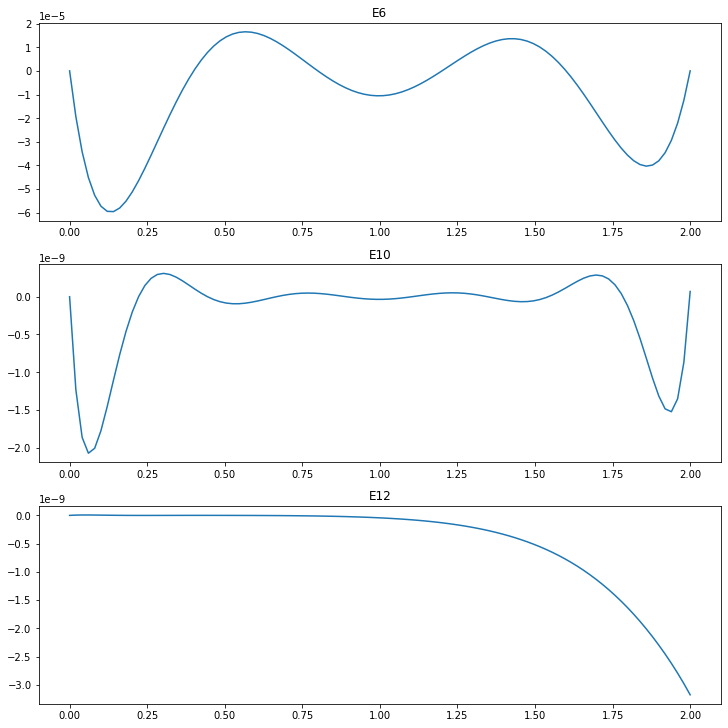

## 4

Implemente el código necesario para el cálculo de diferencias divididas del Ejemplo 2 del Metodo de Newton.

## 5

Implemente el código necesario para el cálculo del polinómio de Newton del Ejemplo 2 del Metodo de Newton.